(boron-nitride-nb)=
# Boron-nitride ribbon

This boron-nitride ribbon calculation illustrates a case where it is a good idea to change a nonperiodic lattice vector to be
normal to the periodic direction(s).  While the model is physically the same before and after the change, as shown by the
identical band structures, the Berry phase is consistent with the polarization in the extended direction only after the change.

In [1]:
from pythtb import TBModel, WFArray, Mesh
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# define lattice vectors
lat = [[1, 0], [1/2, np.sqrt(3)/2]]
# define coordinates of orbitals
orb = [[1/3, 1/3], [2/3, 2/3]]

# make two dimensional tight-binding boron nitride model
my_model = TBModel(2, 2, lat, orb)

# set periodic model
delta = 0.4
t = -1.0
my_model.set_onsite([-delta, delta])
my_model.set_hop(t, 0, 1, [0, 0])
my_model.set_hop(t, 1, 0, [1, 0])
my_model.set_hop(t, 1, 0, [0, 1])

## `TBModel.cut_piece`

Now we cut out 3 unit cells along second direction with open boundary conditions to make a ribbon model.

In [3]:
model_orig = my_model.cut_piece(3, 1, glue_edgs=False)
print(model_orig)

----------------------------------------
       Tight-binding model report       
----------------------------------------
r-space dimension           = 2
k-space dimension           = 1
number of spin components   = 1
periodic directions         = [0]
number of orbitals          = 6
number of electronic states = 6

Lattice vectors (Cartesian):
  # 0 ===> [ 1.000 ,    0   ]
  # 1 ===> [ 0.500 ,  0.866 ]
Orbital vectors (dimensionless):
  # 0 ===> [ 0.333 ,  0.333 ]
  # 1 ===> [ 0.667 ,  0.667 ]
  # 2 ===> [ 0.333 ,  1.333 ]
  # 3 ===> [ 0.667 ,  1.667 ]
  # 4 ===> [ 0.333 ,  2.333 ]
  # 5 ===> [ 0.667 ,  2.667 ]
Site energies:
  # 0 ===> -0.400 
  # 1 ===>  0.400 
  # 2 ===> -0.400 
  # 3 ===>  0.400 
  # 4 ===> -0.400 
  # 5 ===>  0.400 
Hoppings:
  < 0 | H | 1 + [ 0.0 ,  0.0 ] >  ===> -1.0000
  < 1 | H | 0 + [ 1.0 ,  0.0 ] >  ===> -1.0000
  < 1 | H | 2 + [ 0.0 ,  0.0 ] >  ===> -1.0000
  < 2 | H | 3 + [ 0.0 ,  0.0 ] >  ===> -1.0000
  < 3 | H | 2 + [ 1.0 ,  0.0 ] >  ===> -1.0000
  < 3 

## `TBModel.change_nonperiodic_vector`

Construct and display new model with nonperiodic lattice vector changed to be normal to the periodic direction

In [4]:
model_perp = model_orig.change_nonperiodic_vector(1, to_home_warning=False)
print(model_perp)

[array([0.5       , 0.33333333]), array([1.        , 0.66666667]), array([1.        , 1.33333333]), array([1.5       , 1.66666667]), array([1.5       , 2.33333333]), array([2.        , 2.66666667])] [[0.33333333 0.33333333]
 [0.66666667 0.66666667]
 [0.33333333 1.33333333]
 [0.66666667 1.66666667]
 [0.33333333 2.33333333]
 [0.66666667 2.66666667]]
----------------------------------------
       Tight-binding model report       
----------------------------------------
r-space dimension           = 2
k-space dimension           = 1
number of spin components   = 1
periodic directions         = [0]
number of orbitals          = 6
number of electronic states = 6

Lattice vectors (Cartesian):
  # 0 ===> [ 1.000 ,    0   ]
  # 1 ===> [   0   ,  0.866 ]
Orbital vectors (dimensionless):
  # 0 ===> [ 0.500 ,  0.333 ]
  # 1 ===> [ 1.000 ,  0.667 ]
  # 2 ===> [ 1.000 ,  1.333 ]
  # 3 ===> [ 1.500 ,  1.667 ]
  # 4 ===> [ 1.500 ,  2.333 ]
  # 5 ===> [ 2.000 ,  2.667 ]
Site energies:
  # 0 ===> -0.4

We can check that our choice of lattice vectors do not affect the physical geometry of the system by comparing the Cartesian coordinates of the orbitals before and after the change.

In [5]:
print(f"Original orbital vectors in Cartesian coordinates : \n {model_orig.get_orb(cartesian=True)}\n")
print(f"New orbital vectors in Cartesian coordinates : \n {model_perp.get_orb(cartesian=True)}")

Original orbital vectors in Cartesian coordinates : 
 [[0.5        0.28867513]
 [1.         0.57735027]
 [1.         1.15470054]
 [1.5        1.44337567]
 [1.5        2.02072594]
 [2.         2.30940108]]

New orbital vectors in Cartesian coordinates : 
 [[0.5        0.28867513]
 [1.         0.57735027]
 [1.         1.15470054]
 [1.5        1.44337567]
 [1.5        2.02072594]
 [2.         2.30940108]]


## Bands and Berry phase
  
Solve both models, showing that the band structures are the same, but Berry phases are different.

We will utilize the `Mesh` to store the k-points, and then solve the model on this mesh using the `WFArray` class and its method
`solve_k_mesh`.

:::{note}
The `solve_k_mesh` method will automatically impose periodic boundary conditions on the wave functions when it detects a periodicity in the k-space mesh. To suppress this behavior, you can set the `auto_detect_pbc` argument to `False`.
:::

To compute the Berry phase, we use `WFArray.berry_phase`, passing the band indices and the mesh axis corresponding to direction we compute the Berry phase.

TypeError: Mesh.build_path() got an unexpected keyword argument 'path_k'

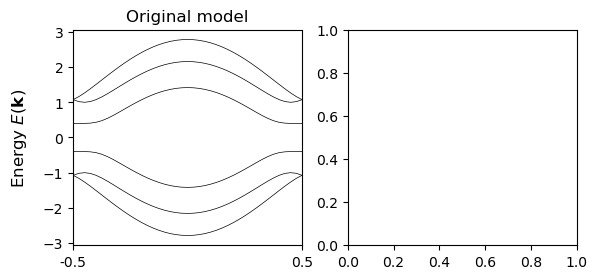

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(6.5, 2.8))

def run_model(model, panel, title):
    numk = 41
    k_path = [[-0.5], [0.5]]
    k_vec, _, _ = model.k_path(k_path, numk, report=False)

    model.plot_bands(k_path=k_path, nk=numk, fig=fig, ax=ax[panel], lc="k", lw=0.5)
    ax[panel].set_title(title)
    ax[panel].set_xticklabels([-0.5, 0.5])

    mesh = Mesh(model)
    mesh.build_path(path_k=k_vec, n_interp=1)
    wf = WFArray(model, mesh)
    wf.solve_k_mesh()

    n_occ = model.nstate // 2
    berry_phase = wf.berry_phase(range(n_occ), dir=0)
    print(f"Berry phase = {berry_phase}\n")

run_model(model_orig, 0, "Original model")
run_model(model_perp, 1, "Revised model")

fig.tight_layout()
plt.show()

## Notes

:::{note}

Let $x$ be along the extended direction and $y$ be normal to it.

This model has an $M_x$ mirror symmetry, so the Berry phase is
expected to be $0$ or $\pi$. We find it to be zero, but only after the
'change_nonperiodic_vector' method is used to force the nonperiodic
"lattice vector" to be perpedicular to the extended direction.

The physical meaning of the Berry phase in the original model
calculation is rather subtle. It is related to the position of
the joint Wannier center (i.e., summed over occupied bands) in
the direction of reciprocal lattice vector 0, which has a
$y$ component as well as an $x$ component (since it must be normal
to real space lattice vector 1). The joint Wannier center gets
displaced along $y$ as the hopping $t$ is changed, so the Berry
phase calculation gets "contaminated" by this displacement.
:::